# #DuBoisChallenge2024 Challenge 07

Alright, it's time for a Du Bois chart again. As the plot is fairly easy this time, I'll share how you implement a relative fontsize that depends on your fig size.

We'll work through it in three steps:

1. Load the data
2. Final visualisation
3. Add dynamic font size

But first, we load the required packages:

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from colors import dubois_colors
%matplotlib notebook

## 1. Load the data

We first load the challenge data using pandas. 



In [6]:
df = pd.read_csv('2024/challenge07/data.csv', header=None)
df.columns = ['country', 'percentage']
df.head(5)

,country,percentage
0,Romaine,72.9363
1,Servie,72.2908
2,Russie,72.2908
3,"Negroes, U.S.A.",56.8000
4,Hongrie,55.5090


That looks okay. (Keep in mind that the input data doesn't have a header row, so I add those manually.)

## 2. Final visualisation

The code below shows you how you can plot the data in Du Bois's style. I wrap it in a function to make it easier to use again:

In [7]:
def plot_data_by_df_and_width(df, width):
    # set plot sizes
    a_paper_aspect = 10.5/7.4
    figsize = (width,width*a_paper_aspect)

    # define plot area
    fig, ax = plt.subplots(
        figsize=figsize, 
        facecolor=dubois_colors['bg']
    )
    
    # sort values for correct order
    df = df.sort_values(by='percentage', ascending=True)
    
    # get max values for later use
    max_percentage = max(df['percentage'])
    max_index = max(df.index.values)

    # make color list based on countries
    colors = []
    for country in df['country']:
        if country == 'Negroes, U.S.A.':
            colors.append(dubois_colors.get('crimson'))
            continue
        colors.append(dubois_colors.get('green'))

    # set line widht for line effects
    line_width = .2
    
    # plot main data
    ax.barh(
        df['country'],
        df['percentage'],
        color=colors,
        edgecolor=dubois_colors.get('black'),
        lw=line_width,
        height=.55,

    )
    
    # add plot lines as visible in original
    ax.plot(
        [0,0],
        [-1, max_index+1.5],
        lw=line_width,
        color='black',
        alpha=.5,
    )
    ax.plot(
        [-20, 100],
        [max_index+1.5, max_index+1.5],
        lw=line_width,
        color='black',
        alpha=.5,
    )

    # modify axes
    ax.set_xlim(-20, 80)
    ax.axis('off')

    # font settings
    rob_font_title = {'fontname':'Roboto Slab', 'fontweight': 'light'}
    large_font_settings = {
        'fontsize': 13
    }
    small_font_settings = {
        'fontsize': 10
    }
    
    # add data labels on y-axis
    for index, country in enumerate(df['country']):
        plt.text(
            x=-18,
            y=index,
            s=country,
            va='center',
            ha='left',
            **small_font_settings,
            **rob_font_title,
        )

    # add various plot titles
    plt.text(
        x=.5,
        y=.95,
        s='''
            Illiteracy of the American Negroes compared with that of other nations.
        ''',
        va='center',
        ha='center',
        transform=fig.transFigure,
        alpha=.5,
        **large_font_settings,
        **rob_font_title,
    )
    plt.text(
        x=.5,
        y=.93,
        s='  ──────────────',
        va='center',
        ha='center',
        transform=fig.transFigure,
        alpha=.5,
        **small_font_settings,     
    )
    plt.text(
        x=.5,
        y=.91,
        s='''
            Proportion d'illettrés parmi les Nègres Americans comparée à celle des autres nations.
        ''',
        va='center',
        ha='center',
        transform=fig.transFigure,
        alpha=.5,
        **small_font_settings,    
        **rob_font_title,
    )
    plt.text(
        x=.5,
        y=.89,
        s='  ──────────────',
        va='center',
        ha='center',
        transform=fig.transFigure,
        alpha=.5,
        **small_font_settings    ,
    )

    plt.text(
        x=.5,
        y=.875,
        s='Done by Atlanta University.',
        va='center',
        ha='center',
        transform=fig.transFigure,
        alpha=.5,
        **small_font_settings,
        **rob_font_title
    )
    
    # update plot margin
    plt.subplots_adjust(top=0.85, bottom=-.05, left=0, right=1)

Let's use it:

<IPython.core.display.Javascript object>


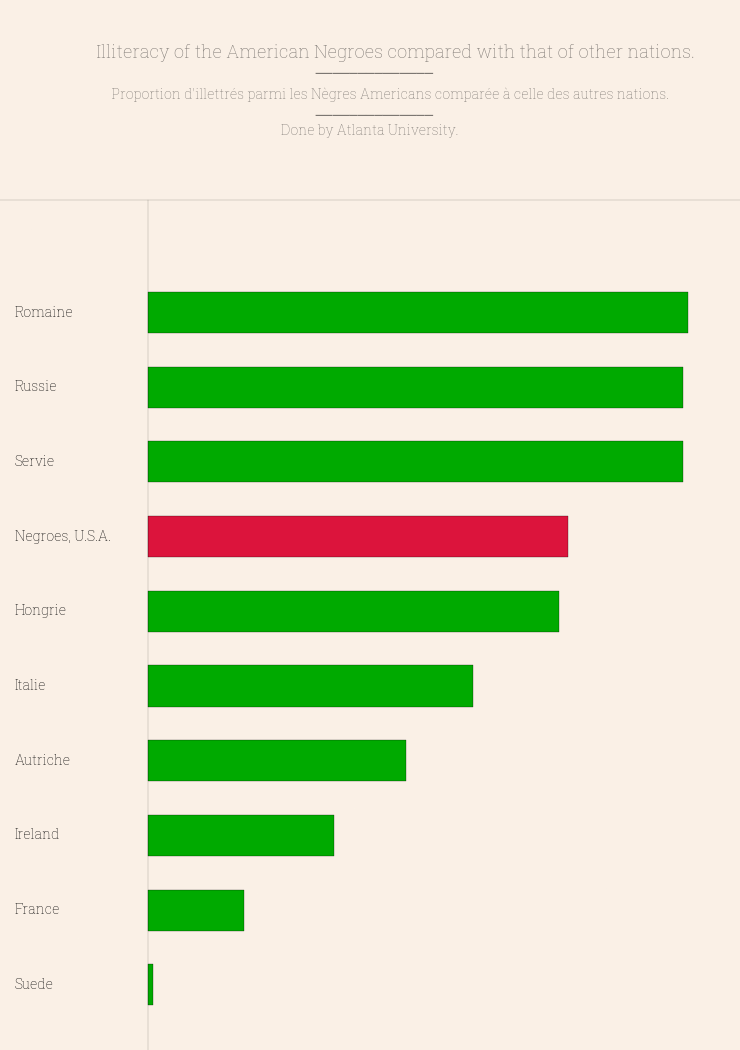

In [8]:
plot_data_by_df_and_width(
    df=df,
    width=7.4
)

## 3. Dynamic type

Now if we resize the image, the fonts will be all messed up:

<IPython.core.display.Javascript object>


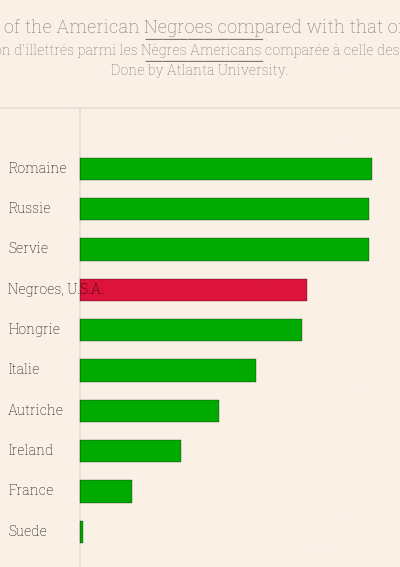

In [9]:
plot_data_by_df_and_width(
    df=df,
    width=4
)

We can fix this by making all font sizes dependent on the original width we work with (in my case, that is `7.4`). The cell below holds the modified function. There are two `# comments` that show you where the changes have been added.

<IPython.core.display.Javascript object>


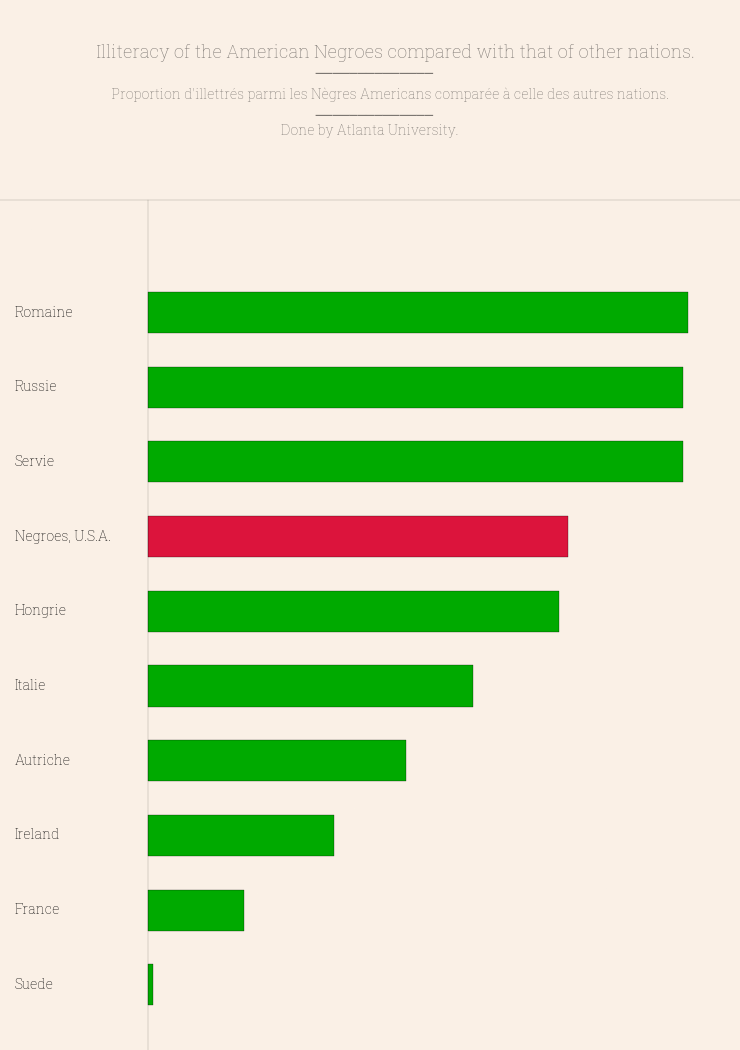

In [10]:
def plot_data_by_df_and_width(df, width):
    a_paper_aspect = 10.5/7.4
    figsize = (width,width*a_paper_aspect)
    # calc relative size
    rel_size = width/7.4

    fig, ax = plt.subplots(
        figsize=figsize, 
        facecolor=dubois_colors['bg']
    )
    
    df = df.sort_values(by='percentage', ascending=True)
    max_percentage = max(df['percentage'])
    max_index = max(df.index.values)

    colors = []

    for country in df['country']:
        if country == 'Negroes, U.S.A.':
            colors.append(dubois_colors.get('crimson'))
        colors.append(dubois_colors.get('green'))

    line_width = .2
    
    ax.barh(
        df['country'],
        df['percentage'],
        color=colors,
        edgecolor=dubois_colors.get('black'),
        lw=line_width,
        height=.55,

    )

    # add plot lines
    ax.plot(
        [0,0],
        [-1, max_index+1.5],
        lw=line_width,
        color='black',
        alpha=.5,
    )


    ax.plot(
        [-20, 100],
        [max_index+1.5, max_index+1.5],
        lw=line_width,
        color='black',
        alpha=.5,
    )

    ax.set_xlim(-20, 80)
    ax.axis('off')

    rob_font_title = {'fontname':'Roboto Slab', 'fontweight': 'light'}
    
    # resize fontsize here
    large_font_settings = {
        'fontsize': 13*rel_size
    }
    small_font_settings = {
        'fontsize': 10*rel_size
    }
    for index, country in enumerate(df['country']):
        plt.text(
            x=-18,
            y=index,
            s=country,
            va='center',
            ha='left',
            **small_font_settings,
            **rob_font_title,
        )

    plt.text(
        x=.5,
        y=.95,
        s='''
            Illiteracy of the American Negroes compared with that of other nations.
        ''',
        va='center',
        ha='center',
        transform=fig.transFigure,
        alpha=.5,
        **large_font_settings,
        **rob_font_title,
    )
    plt.text(
        x=.5,
        y=.93,
        s='  ──────────────',
        va='center',
        ha='center',
        transform=fig.transFigure,
        alpha=.5,
        **small_font_settings,     
    )
    plt.text(
        x=.5,
        y=.91,
        s='''
            Proportion d'illettrés parmi les Nègres Americans comparée à celle des autres nations.
        ''',
        va='center',
        ha='center',
        transform=fig.transFigure,
        alpha=.5,
        **small_font_settings,    
        **rob_font_title,
    )
    plt.text(
        x=.5,
        y=.89,
        s='  ──────────────',
        va='center',
        ha='center',
        transform=fig.transFigure,
        alpha=.5,
        **small_font_settings    ,
    )

    plt.text(
        x=.5,
        y=.875,
        s='Done by Atlanta University.',
        va='center',
        ha='center',
        transform=fig.transFigure,
        alpha=.5,
        **small_font_settings,
        **rob_font_title
    )

    plt.subplots_adjust(top=0.85, bottom=-.05, left=0, right=1)
    
plot_data_by_df_and_width(
    df=df,
    width=7.4
)

Alright, let's give the updated function a try with a smaller width.

<IPython.core.display.Javascript object>


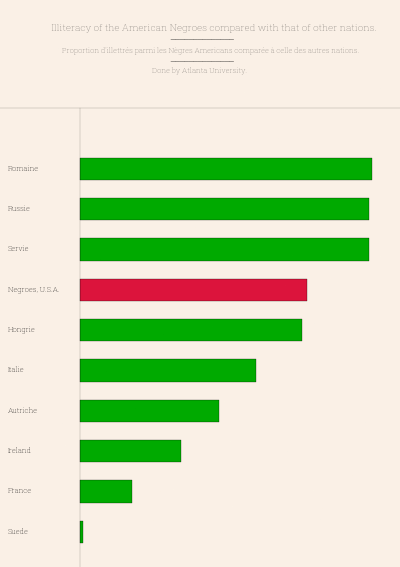

In [11]:
plot_data_by_df_and_width(
    df=df,
    width=4
)

Nice!

Let's try a larger one.

<IPython.core.display.Javascript object>


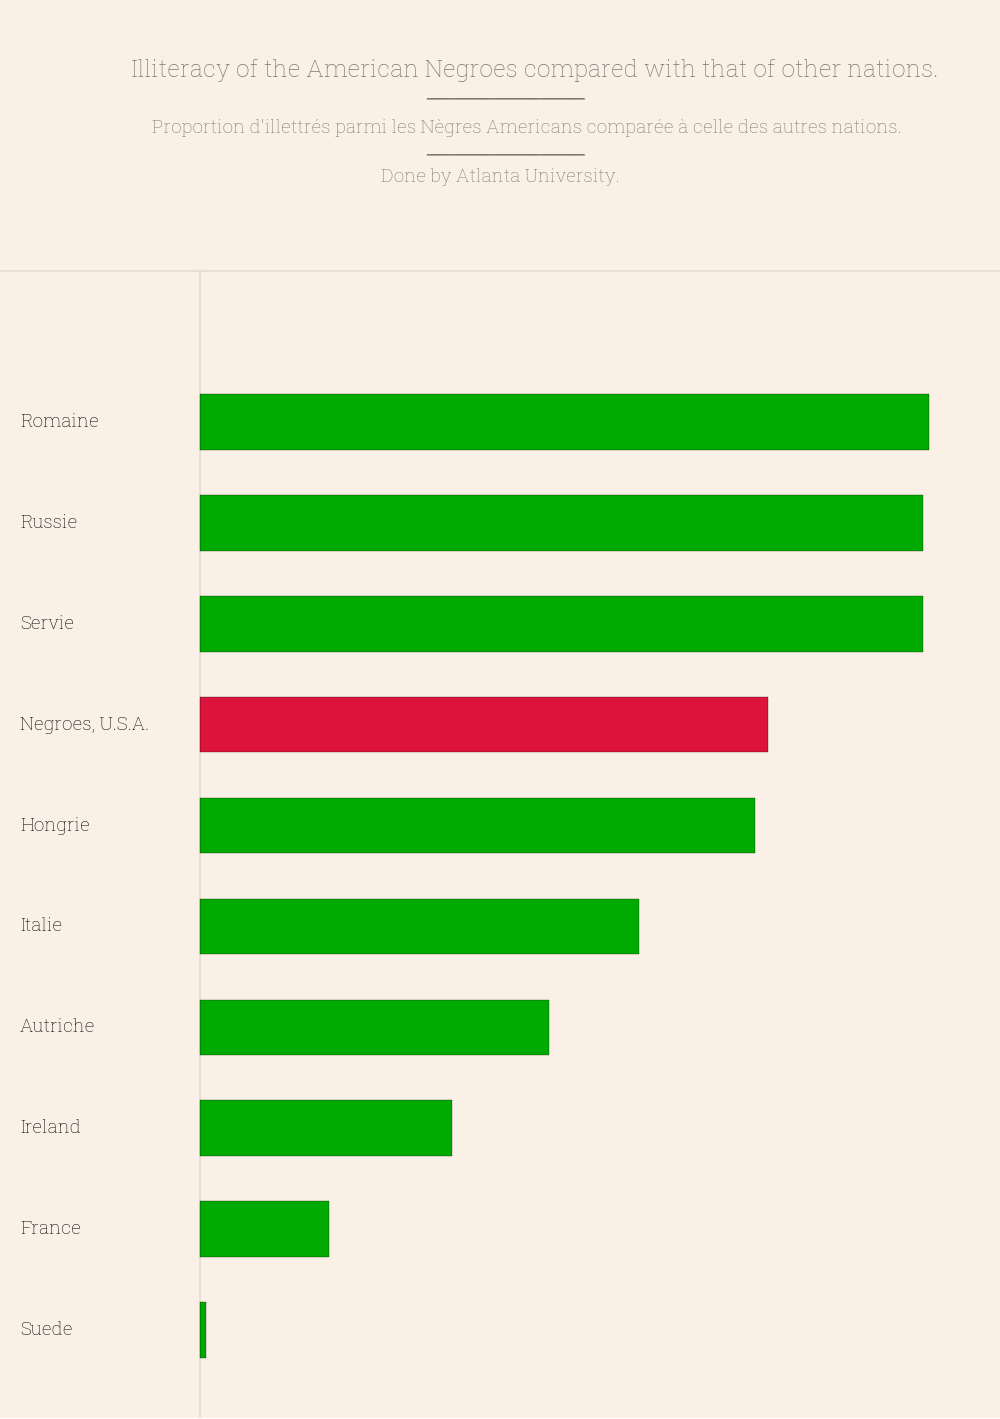

In [12]:
plot_data_by_df_and_width(
    df=df,
    width=10
)

And let's get back to the original width:

<IPython.core.display.Javascript object>


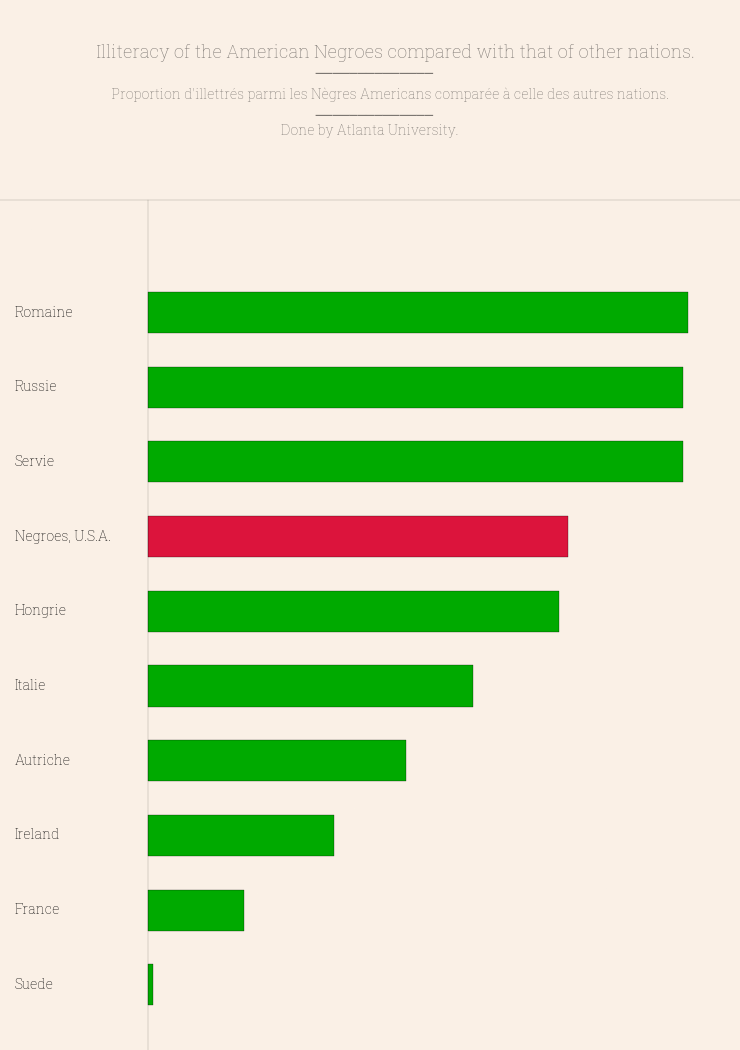

In [13]:
plot_data_by_df_and_width(
    df=df,
    width=7.4
)

Alright. That's it!